In [1]:
import jupyterworkflow.Data


# Python Code I'll put here until I can import it successfully

In [2]:
# 'Google Trend.xlsx'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


def GetMergedAmazonDataFrames():
    files_to_use = [r'data\AirPods Pro.csv', r'data\Elite 75t.csv',r'data\Free.csv',
                   r'data\Galaxy Buds Plus.csv',r'data\M-200.csv',r'data\NC700.csv',
                   r'data\Soundcore Liberty 2 Pro.csv',r'data\Soundcore Liberty Air 2.csv',r'data\Soundcore Life Q20.csv',
                   r'data\WF-1000XM3.csv']
    amzn_df = pd.read_csv(files_to_use[0],  parse_dates=False)
    for file in files_to_use[1:]:
        df = pd.read_csv(file,  parse_dates=False)
#         amzn_df = pd.merge(amzn_df, df, how='outer',on='review_date')
        amzn_df = pd.concat([amzn_df,df],sort=False)
        
    amzn_df['review_date'] = pd.to_datetime(amzn_df['review_date'], format='%Y-%m-%d')
    amzn_df = amzn_df[['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
       'review_date', 'review_title', 'review_text']]
    return amzn_df
 
# ORIGINALLY I WAS GOING TO APPEND INTO A DATA SET WITH DATE,COUNT,PRODUCTNAME format
# def GetGoogleTrendsDF():
#     sheets_in_xls = ['Momentum True Wireless 2','WH-1000XM3','AirPds Pro',' Noise Cancelling Headphones 70',
#                     'Elite 75t','Soundcore Liberty Air 2','WF-1000XM3','Free','Soundcore Life Q20','Soundcore Liberty 2 Pro']
    
#     df= GetXLSSheetToDF(sheets_in_xls[0])
#     df['ProductName'] = df['Week']
#     df['ProductName'] = df['ProductName'].apply(lambda x: df.columns[1].replace(': (United States)',''))
#     df.rename(columns={df.columns[1]: "Count"}, inplace=True) 
#     for sheetname in sheets_in_xls[1:]:
#         next_df = GetXLSSheetToDF(sheetname)
#         next_df['ProductName'] = next_df['Week']
#         next_df['ProductName'] = next_df['ProductName'].apply(lambda x: next_df.columns[1].replace(': (United States)',''))
#         next_df.rename(columns={next_df.columns[1]: "Count"}, inplace=True)
        
#     return df


def GetXLSSheetToDF(sheetname):
    return pd.read_excel('data\Google Trend.xlsx', sheet_name=sheetname, parse_dates=False)

def GetGoogleTrendsDF():
    sheets_in_xls = ['Momentum True Wireless 2','WH-1000XM3','AirPds Pro',' Noise Cancelling Headphones 70',
                    'Elite 75t','Soundcore Liberty Air 2','WF-1000XM3','Free','Soundcore Life Q20','Soundcore Liberty 2 Pro']
    
    df= GetXLSSheetToDF(sheets_in_xls[0])
    df.rename(columns={df.columns[1]: df.columns[1].replace(': (United States)','')}, inplace=True) 
    
    for sheetname in sheets_in_xls[1:]:
        next_df = GetXLSSheetToDF(sheetname)
        next_df.rename(columns={next_df.columns[1]: next_df.columns[1].replace(': (United States)','')}, inplace=True)
        df = pd.merge(df, next_df, how='outer',on='Week')
    df['Week'] = pd.to_datetime(df['Week'], format='%Y-%m-%d')
    # TODO: it might not be bad to set na values to 0, but isn't necessary for this data...
    return df
    

# weather_df['review_date'] = pd.to_datetime(weather_df['review_date'], format='%Y-%m-%d')
# googleTrends_df
airpods_amzn_df = GetMergedAmazonDataFrames()
print(airpods_amzn_df.columns)
airpods_amzn_df.head()

Index(['Manufacturer', 'ProductName', 'review_rating', 'verified_purchase',
       'review_date', 'review_title', 'review_text'],
      dtype='object')


,Manufacturer,ProductName,review_rating,verified_purchase,review_date,review_title,review_text
0,Apple,AirPods Pro,5,0,2019-10-30,Airpods Pro deliver😎,This airpods pro do exactly what apple said th...
1,Apple,AirPods Pro,4,0,2019-10-30,List of Features/Changes compared to Airpods (v2),"Like iphone 11 Pro, Macbook Pro, Airpad Pro; t..."
2,Apple,AirPods Pro,3,0,2019-10-30,Cool but expensive,First review yeh heard about these excited but...
3,Apple,AirPods Pro,5,0,2019-10-30,Lit,They fire
4,Apple,AirPods Pro,5,1,2019-10-31,Saved my marriage,"With the new transparency mode, I can listen t..."


# Defining Data sets to use... 

In [3]:

googleTrends_df = GetGoogleTrendsDF()

amzn_df = GetMergedAmazonDataFrames()

googleTrends_df.head()

,Week,Sennheiser Momentum True Wireless 2,Sony WH-1000XM3,Apple AirPods Pro,Bose Noise Cancelling Headphones 700,Jabra Elite 75t,Anker Soundcore Liberty Air 2,Sony WF-1000XM3,EarFun Free,Anker Soundcore Life Q20,Anker Soundcore Liberty 2 Pro
0,2019-01-06,0,26,1,0,0,0,0,0,0,0
1,2019-01-13,9,22,1,0,0,0,0,0,0,0
2,2019-01-20,0,23,1,0,0,0,0,0,0,0
3,2019-01-27,0,29,1,0,0,0,0,0,0,0
4,2019-02-03,9,22,1,0,1,0,0,0,0,0


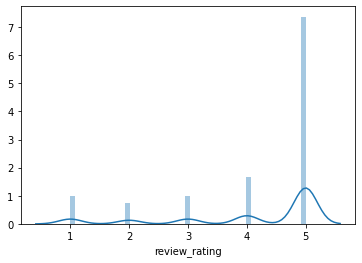

In [4]:
sns.distplot(amzn_df['review_rating']);

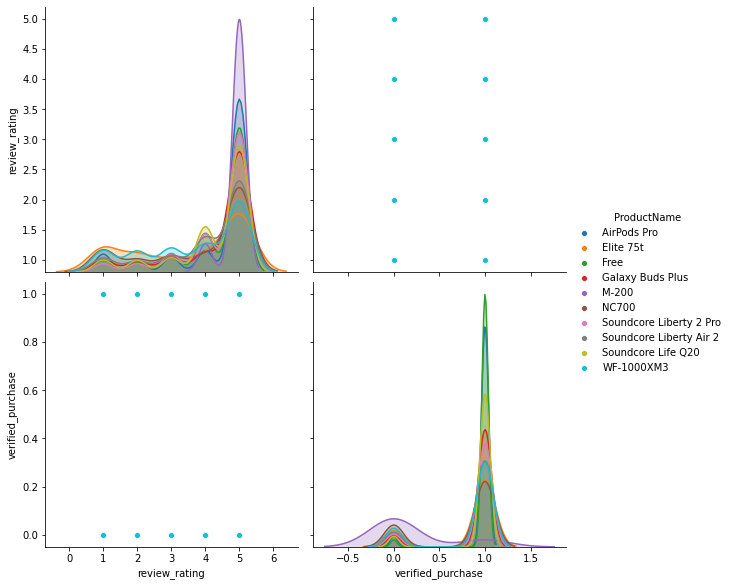

In [17]:

# fig, ax = plt.subplots(figsize=(20,5))
# # seaborn.violinplot(ax=ax, data=df, **violin_options)

# sns.pairplot(amzn_df, hue="ProductName");

# plt.figure(figsize=(20,5))
sns.pairplot(amzn_df, hue="ProductName", height=4);